#### EDA Case Study

**Introduction**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specializes in lending various types of loans to urban customers. We will have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

**Data Understanding**

This dataset has 3 files as explained below:

`application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

`columns_description.xlsx` is data dictionary which describes the meaning of the variables.


I have given a link to the data files in a drive folder [here](https://drive.google.com/drive/folders/1YpPjU4Y12MPrMdWaNDa6rS2MNirh2FG3?usp=sharing).  I suggest unzipping them and putting them in your google drive, and link to them directly using colab and its "mount drive" functionality.

In [1]:
#Link to zien's google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Where is the files
import os
os.listdir('/content/drive/MyDrive/EDA_case_study')

['columns_description.xlsx',
 'previous_application.csv',
 'application_data.csv']

In [3]:
import pandas as pd

app = pd.read_csv('/content/drive/MyDrive/EDA_case_study/application_data.csv')
prev = pd.read_csv('/content/drive/MyDrive/EDA_case_study/previous_application.csv')
columns_desc = pd.read_excel('/content/drive/MyDrive/EDA_case_study/columns_description.xlsx')



In [5]:
#Check
app.shape
app.head()
app.info()

prev.shape
prev.head()
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROC

In [7]:
#default proportion
app['TARGET'].value_counts(normalize=True)


,proportion
TARGET,
0,0.919271
1,0.080729


In [8]:
#Variables:EXT_SOURCE_3
ext = app[['EXT_SOURCE_3','TARGET']].dropna()

ext['ext_bin'] = pd.qcut(ext['EXT_SOURCE_3'], 5)

ext_default = ext.groupby('ext_bin')['TARGET'].mean().reset_index()
ext_default

/tmp/ipython-input-132089280.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ext_default = ext.groupby('ext_bin')['TARGET'].mean().reset_index()


,ext_bin,TARGET
0,"(-0.000473, 0.33]",0.163758
1,"(0.33, 0.476]",0.087505
2,"(0.476, 0.592]",0.057505
3,"(0.592, 0.694]",0.044795
4,"(0.694, 0.896]",0.033763


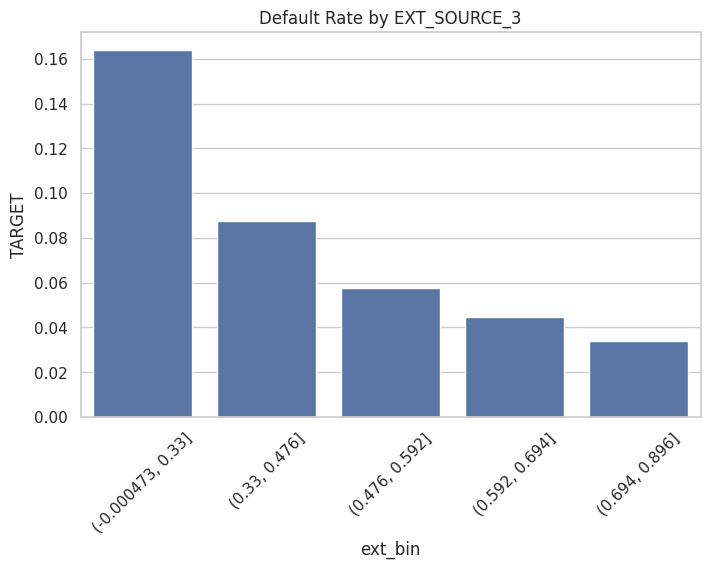

In [10]:
#figure
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.barplot(data=ext_default,
            x='ext_bin',
            y='TARGET')

plt.xticks(rotation=45)
plt.title("Default Rate by EXT_SOURCE_3")
plt.show()

In [11]:
#AMT_INCOME_TOTAL
income = app[['AMT_INCOME_TOTAL','TARGET']].dropna()

income['income_bin'] = pd.qcut(income['AMT_INCOME_TOTAL'], 5)

income_default = income.groupby('income_bin')['TARGET'].mean().reset_index()
income_default


/tmp/ipython-input-3269936971.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_default = income.groupby('income_bin')['TARGET'].mean().reset_index()


,income_bin,TARGET
0,"(25649.999, 99000.0]",0.082062
1,"(99000.0, 135000.0]",0.085883
2,"(135000.0, 162000.0]",0.086847
3,"(162000.0, 225000.0]",0.080569
4,"(225000.0, 117000000.0]",0.065198


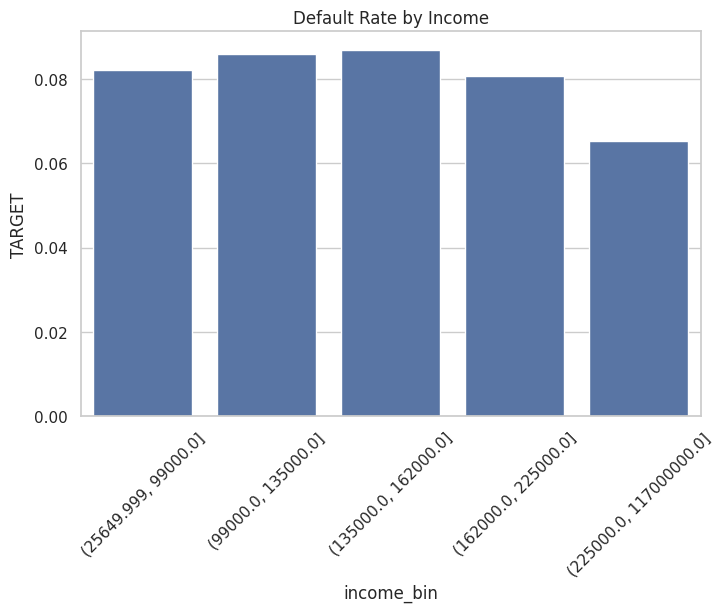

In [12]:
# figure
plt.figure(figsize=(8,5))
sns.barplot(data=income_default,
            x='income_bin',
            y='TARGET')

plt.xticks(rotation=45)
plt.title("Default Rate by Income")
plt.show()

In [13]:
#AMT_CREDIT
credit = app[['AMT_CREDIT','TARGET']].dropna()

credit['credit_bin'] = pd.qcut(credit['AMT_CREDIT'], 5)

credit_default = credit.groupby('credit_bin')['TARGET'].mean().reset_index()
credit_default

/tmp/ipython-input-2964908498.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_default = credit.groupby('credit_bin')['TARGET'].mean().reset_index()


,credit_bin,TARGET
0,"(44999.999, 254700.0]",0.072376
1,"(254700.0, 432000.0]",0.091724
2,"(432000.0, 604152.0]",0.100549
3,"(604152.0, 900000.0]",0.078549
4,"(900000.0, 4050000.0]",0.060752


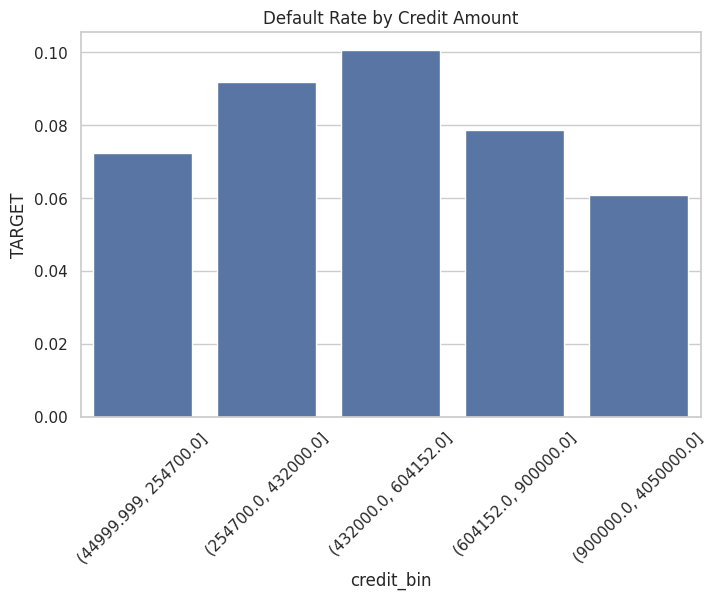

In [14]:
#Figure
plt.figure(figsize=(8,5))
sns.barplot(data=credit_default,
            x='credit_bin',
            y='TARGET')

plt.xticks(rotation=45)
plt.title("Default Rate by Credit Amount")
plt.show()

In [15]:
#CNT_PAYMENT
prev_term = prev.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean().reset_index()

prev_term = prev_term.merge(app[['SK_ID_CURR','TARGET']],
                            on='SK_ID_CURR',
                            how='left')

prev_term = prev_term.dropna(subset=['TARGET'])

prev_term['term_bin'] = pd.qcut(prev_term['CNT_PAYMENT'],5)

term_default = prev_term.groupby('term_bin')['TARGET'].mean().reset_index()
term_default

/tmp/ipython-input-2266201701.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  term_default = prev_term.groupby('term_bin')['TARGET'].mean().reset_index()


,term_bin,TARGET
0,"(-0.001, 8.0]",0.081221
1,"(8.0, 11.0]",0.070361
2,"(11.0, 14.0]",0.078377
3,"(14.0, 20.5]",0.081282
4,"(20.5, 72.0]",0.098450


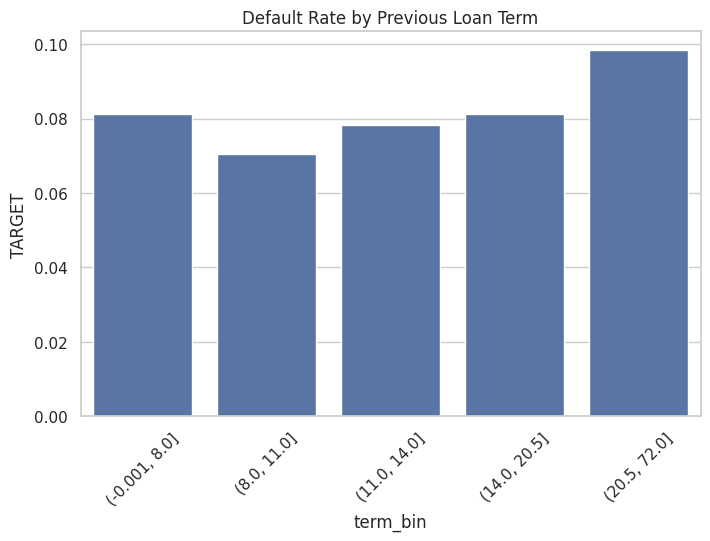

In [16]:
#Figure
plt.figure(figsize=(8,5))
sns.barplot(data=term_default,
            x='term_bin',
            y='TARGET')

plt.xticks(rotation=45)
plt.title("Default Rate by Previous Loan Term")
plt.show()

In [17]:
#'RATE_DOWN_PAYMENT
down = prev.groupby('SK_ID_CURR')['RATE_DOWN_PAYMENT'].mean().reset_index()

down = down.merge(app[['SK_ID_CURR','TARGET']],
                  on='SK_ID_CURR',
                  how='left')

down = down.dropna(subset=['TARGET'])

down['down_bin'] = pd.qcut(down['RATE_DOWN_PAYMENT'],5)

down_default = down.groupby('down_bin')['TARGET'].mean().reset_index()
down_default

/tmp/ipython-input-2999110991.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  down_default = down.groupby('down_bin')['TARGET'].mean().reset_index()


,down_bin,TARGET
0,"(-0.00100749, 0.0]",0.092614
1,"(0.0, 0.0498]",0.086247
2,"(0.0498, 0.0973]",0.078087
3,"(0.0973, 0.121]",0.077447
4,"(0.121, 0.99]",0.065277


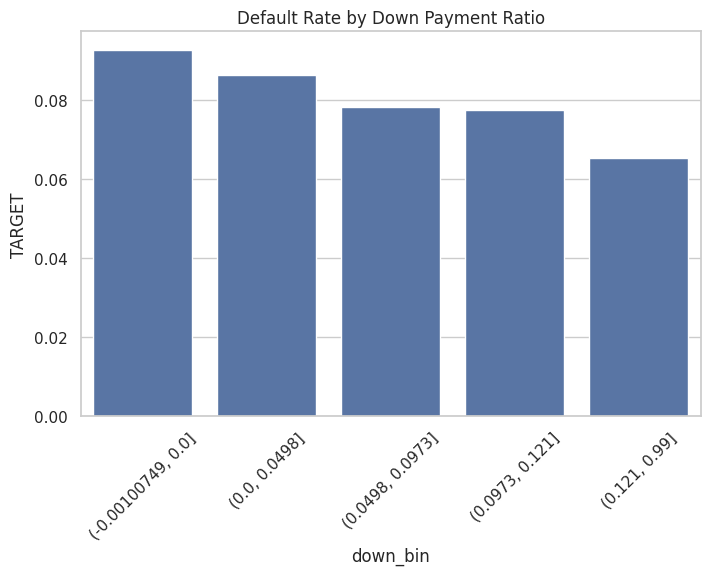

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=down_default,
            x='down_bin',
            y='TARGET')

plt.xticks(rotation=45)
plt.title("Default Rate by Down Payment Ratio")
plt.show()

In [19]:
#DAYS_DECISION
decision = prev.groupby('SK_ID_CURR')['DAYS_DECISION'].max().reset_index()

decision = decision.merge(app[['SK_ID_CURR','TARGET']],
                          on='SK_ID_CURR',
                          how='left')

decision = decision.dropna(subset=['TARGET'])

decision['decision_bin'] = pd.qcut(decision['DAYS_DECISION'],5)

decision_default = decision.groupby('decision_bin')['TARGET'].mean().reset_index()
decision_default

/tmp/ipython-input-3512355970.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decision_default = decision.groupby('decision_bin')['TARGET'].mean().reset_index()


,decision_bin,TARGET
0,"(-2922.001, -700.0]",0.073682
1,"(-700.0, -385.0]",0.076413
2,"(-385.0, -233.0]",0.081529
3,"(-233.0, -119.0]",0.089419
4,"(-119.0, -1.0]",0.088634


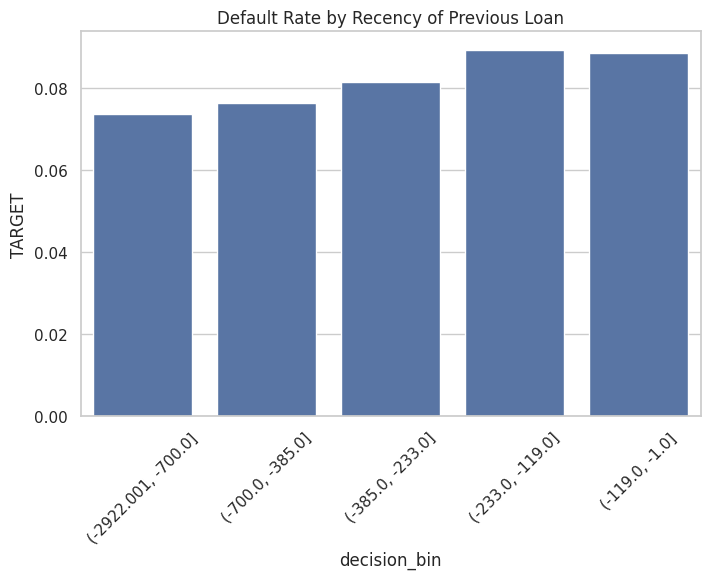

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=decision_default,
            x='decision_bin',
            y='TARGET')

plt.xticks(rotation=45)
plt.title("Default Rate by Recency of Previous Loan")
plt.show()

In [22]:
#NAME_YIELD_GROUP
yield_group = prev.groupby(['SK_ID_CURR','NAME_YIELD_GROUP']).size().reset_index(name='count')

yield_group = yield_group.sort_values(['SK_ID_CURR','count'],ascending=False)
yield_group = yield_group.drop_duplicates('SK_ID_CURR')

yield_group = yield_group.merge(app[['SK_ID_CURR','TARGET']],
                                on='SK_ID_CURR',
                                how='left')

yield_default = yield_group.groupby('NAME_YIELD_GROUP')['TARGET'].mean().reset_index()
yield_default

,NAME_YIELD_GROUP,TARGET
0,XNA,0.093950
1,high,0.089625
2,low_action,0.056145
3,low_normal,0.060441
4,middle,0.073260


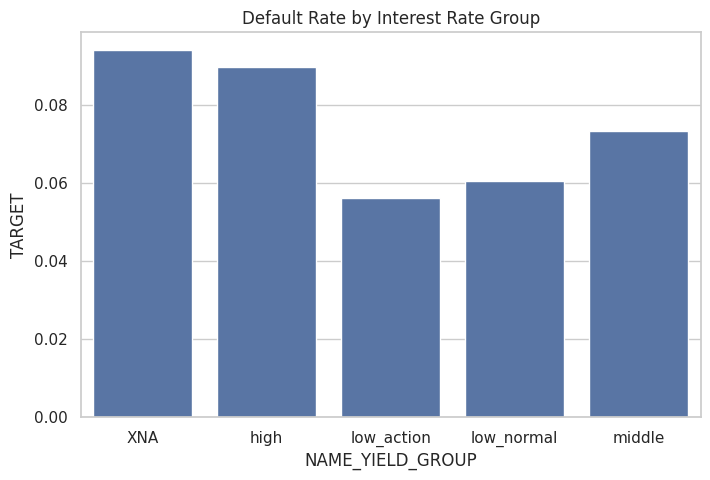

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=yield_default,
            x='NAME_YIELD_GROUP',
            y='TARGET')

plt.title("Default Rate by Interest Rate Group")
plt.show()

In [24]:
#refused
refused = prev[prev['NAME_CONTRACT_STATUS']=='Refused']

refused_count = refused.groupby('SK_ID_CURR').size().reset_index(name='refused_cnt')

refused_count = refused_count.merge(app[['SK_ID_CURR','TARGET']],
                                    on='SK_ID_CURR',
                                    how='left')

refused_count['refused_cnt'] = refused_count['refused_cnt'].fillna(0)

refused_count['refused_bin'] = pd.cut(refused_count['refused_cnt'],
                                      bins=[-1,0,1,3,10])

refused_count.groupby('refused_bin')['TARGET'].mean()

/tmp/ipython-input-1016832066.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  refused_count.groupby('refused_bin')['TARGET'].mean()


,TARGET
refused_bin,
"(-1, 0]",NaN
"(0, 1]",0.088344
"(1, 3]",0.106480
"(3, 10]",0.130295


In [25]:
# approved
approved = prev[prev['NAME_CONTRACT_STATUS']=='Approved']

approved_count = approved.groupby('SK_ID_CURR').size().reset_index(name='approved_cnt')

approved_count = approved_count.merge(app[['SK_ID_CURR','TARGET']],
                                      on='SK_ID_CURR',
                                      how='left')

approved_count['approved_cnt'] = approved_count['approved_cnt'].fillna(0)

approved_count['approved_bin'] = pd.cut(approved_count['approved_cnt'],
                                        bins=[-1,0,1,3,10])

approved_count.groupby('approved_bin')['TARGET'].mean()

/tmp/ipython-input-2692428438.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approved_count.groupby('approved_bin')['TARGET'].mean()


,TARGET
approved_bin,
"(-1, 0]",NaN
"(0, 1]",0.093776
"(1, 3]",0.083845
"(3, 10]",0.069742


In [26]:
#AMT_CREDIT
prev_amt = prev.groupby('SK_ID_CURR')['AMT_CREDIT'].mean().reset_index()

prev_amt = prev_amt.merge(app[['SK_ID_CURR','TARGET']],
                          on='SK_ID_CURR',
                          how='left')

prev_amt['amt_bin'] = pd.qcut(prev_amt['AMT_CREDIT'],5)

prev_amt.groupby('amt_bin')['TARGET'].mean()

/tmp/ipython-input-1209872800.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prev_amt.groupby('amt_bin')['TARGET'].mean()


,TARGET
amt_bin,
"(-0.001, 58639.5]",0.093439
"(58639.5, 95207.625]",0.080089
"(95207.625, 147380.4]",0.080243
"(147380.4, 251189.82]",0.080103
"(251189.82, 4050000.0]",0.075557


In [30]:
#NAME_CONTRACT_TYPE
contract_type = prev.groupby(['SK_ID_CURR','NAME_CONTRACT_TYPE']).size().reset_index(name='count')

contract_type = contract_type.sort_values(['SK_ID_CURR','count'],ascending=False)
contract_type = contract_type.drop_duplicates('SK_ID_CURR')

contract_type = contract_type.merge(app[['SK_ID_CURR','TARGET']],
                                    on='SK_ID_CURR',
                                    how='left')

contract_type.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

,TARGET
NAME_CONTRACT_TYPE,
Cash loans,0.087808
Consumer loans,0.075174
Revolving loans,0.122347
XNA,0.000000


In [31]:
#total_prev_loans
loan_cnt = prev.groupby('SK_ID_CURR').size().reset_index(name='total_prev_loans')

loan_cnt = loan_cnt.merge(app[['SK_ID_CURR','TARGET']],
                          on='SK_ID_CURR',
                          how='left')

loan_cnt['loan_bin'] = pd.cut(loan_cnt['total_prev_loans'],
                              bins=[0,1,3,5,10,50])

loan_cnt.groupby('loan_bin')['TARGET'].mean()

/tmp/ipython-input-3240182503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_cnt.groupby('loan_bin')['TARGET'].mean()


,TARGET
loan_bin,
"(0, 1]",0.083757
"(1, 3]",0.078368
"(3, 5]",0.077032
"(5, 10]",0.082769
"(10, 50]",0.099266


In [32]:
#RATE_DOWN_PAYMENT=0
prev['zero_down'] = (prev['RATE_DOWN_PAYMENT']==0).astype(int)

zero_ratio = prev.groupby('SK_ID_CURR')['zero_down'].mean().reset_index()

zero_ratio = zero_ratio.merge(app[['SK_ID_CURR','TARGET']],
                              on='SK_ID_CURR',
                              how='left')

zero_ratio['flag'] = (zero_ratio['zero_down']>0).astype(int)

zero_ratio.groupby('flag')['TARGET'].mean()

,TARGET
flag,
0,0.081475
1,0.082208


In [36]:
#If bought insurance
insurance = (
    prev
    .groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL']
    .mean()
    .reset_index()
)
insurance = insurance.merge(
    app[['SK_ID_CURR','TARGET']],
    on='SK_ID_CURR',
    how='left'
)

insurance = insurance.dropna(subset=['TARGET'])
insurance['insured_flag'] = (
    insurance['NFLAG_INSURED_ON_APPROVAL'] > 0
).astype(int)
insurance.groupby('insured_flag')['TARGET'].mean()

,TARGET
insured_flag,
0,0.085008
1,0.079155


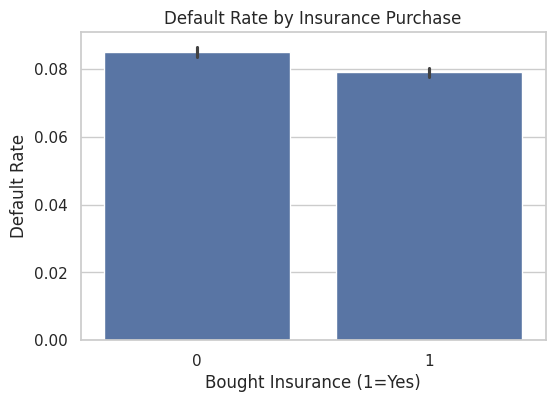

In [38]:
#Figure1
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.barplot(data=insurance,
            x='insured_flag',
            y='TARGET')

plt.title("Default Rate by Insurance Purchase")
plt.xlabel("Bought Insurance (1=Yes)")
plt.ylabel("Default Rate")
plt.show()

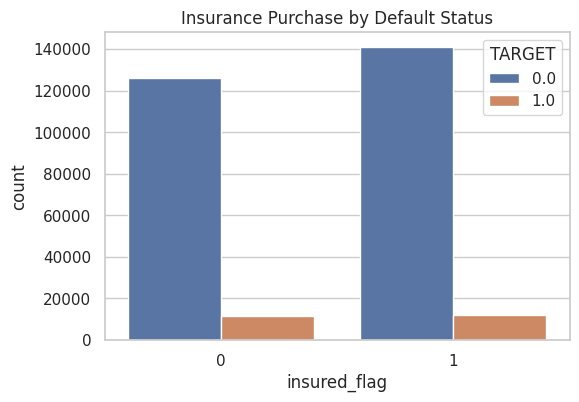

In [39]:
#Figure2
plt.figure(figsize=(6,4))
sns.countplot(data=insurance,
              x='insured_flag',
              hue='TARGET')

plt.title("Insurance Purchase by Default Status")
plt.show()

1. Introduction
This exploratory data analysis (EDA) aims to investigate the key factors associated with loan default risk. The dataset consists of current loan applications and previous loan history records. The target variable indicates whether a client defaulted on the current loan.

The analysis focuses on understanding how applicant characteristics and historical loan behavior relate to default probability, using basic data manipulation with pandas and visualization with seaborn.

2. Data Overview

The application dataset contains 307,511 records and 122 variables, while the previous application dataset contains 1,670,214 historical loan records with 37 variables.

The overall default rate is approximately 8%, indicating an imbalanced classification problem where most applicants do not default.

3. Analysis of Current Application Features
3.1 External Credit Score (EXT_SOURCE_3)

A strong monotonic relationship is observed between EXT_SOURCE_3 and default rate. As the external credit score increases, the default probability decreases significantly. This variable demonstrates one of the strongest predictive signals in the dataset.

3.2 Income (AMT_INCOME_TOTAL)

Higher income groups generally exhibit lower default rates. This suggests that stronger financial capacity improves repayment ability and reduces credit risk.

3.3 Credit Amount (AMT_CREDIT)

The relationship between credit amount and default rate is moderate. Extremely large credit amounts are associated with slightly higher default risk, possibly due to increased repayment burden.

4. Analysis of Previous Loan Behavior

Historical loan behavior provides substantial predictive information about default risk.

4.1 Previous Loan Term (CNT_PAYMENT)

Clients with longer previous loan terms tend to show higher default probability. Longer repayment periods may indicate higher financial burden or structural risk.

4.2 Down Payment Ratio (RATE_DOWN_PAYMENT)

A clear decreasing trend is observed: higher down payment ratios correspond to lower default rates. This suggests that clients contributing more upfront capital are financially stronger and less risky.

4.3 Recency of Previous Loan (DAYS_DECISION)

Clients who borrowed more recently exhibit higher default rates. This may reflect ongoing financial pressure or increased debt exposure.

4.4 Interest Rate Group (NAME_YIELD_GROUP)

Higher interest rate groups show higher default rates. This aligns with risk-based pricing principles, where riskier clients are charged higher interest rates.

4.5 Previous Refused Applications

Clients with multiple previous refused applications tend to have higher default probability, indicating that historical rejection behavior is a strong risk signal.

4.6 Number of Previous Loans

Frequent borrowing behavior is associated with increased default risk, especially for clients with multiple prior loans.

4.7 Zero Down Payment Indicator

Clients with zero down payment history show higher default rates, suggesting higher leverage and risk exposure.

4.8 Insurance Purchase (NFLAG_INSURED_ON_APPROVAL)

Default rates differ between clients who purchased insurance and those who did not. Insurance behavior reflects underlying risk characteristics and may contain additional predictive value.

5. Key Findings

The most important risk indicators identified in this analysis include:

Low external credit score (EXT_SOURCE_3)

Low down payment ratio

High interest rate group

Long previous loan term

Recent borrowing activity

Multiple previous refusals

Zero down payment history

Historical behavioral variables demonstrate strong explanatory power and complement current application information.

6. Conclusion

This exploratory analysis shows that both applicant characteristics and historical loan behavior significantly influence default risk.

External credit score and down payment ratio exhibit the strongest monotonic relationships with default probability. Additionally, historical loan behavior—such as refusal history, loan frequency, interest rate level, and borrowing recency—provides meaningful predictive signals.

These findings support the importance of incorporating both current financial information and past behavioral patterns in credit risk assessment and model development.